In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
%matplotlib inline
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2, pin_memory=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2, pin_memory=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


truck  ship  deer  frog


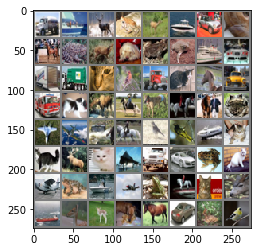

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.xnor = nn.Sequential(
                nn.Conv2d(3, 192, kernel_size=5, stride=1, padding=2),
                nn.BatchNorm2d(192, eps=1e-4, momentum=0.1, affine=False),
                nn.ReLU(inplace=True),
                nn.Conv2d(192, 160, kernel_size=1, stride=1, padding=0),
                nn.Conv2d(160,  96, kernel_size=1, stride=1, padding=0),
                nn.MaxPool2d(kernel_size=3, stride=2, padding=1),

                nn.Conv2d( 96, 192, kernel_size=5, stride=1, padding=2),
                nn.Dropout(0.5),
                nn.Conv2d(192, 192, kernel_size=1, stride=1, padding=0),
                nn.Conv2d(192, 192, kernel_size=1, stride=1, padding=0),
                nn.AvgPool2d(kernel_size=3, stride=2, padding=1),

                nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
                nn.Dropout(0.5),
                nn.Conv2d(192, 192, kernel_size=1, stride=1, padding=0),
                nn.BatchNorm2d(192, eps=1e-4, momentum=0.1, affine=False),
                nn.Conv2d(192,  10, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                nn.AvgPool2d(kernel_size=8, stride=1, padding=0),
                )

    def forward(self, x):
        x = self.xnor(x)
        x = x.view(x.size(0), 10)
        return x

net = Net()
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay = 1e-5)

In [18]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print('%d loss: %.3f' %
          (epoch + 1, running_loss / 2000))

print('Finished Training')


1 loss: 0.371
2 loss: 0.364
3 loss: 0.357
4 loss: 0.352
5 loss: 0.346
6 loss: 0.341
7 loss: 0.336
8 loss: 0.329
9 loss: 0.326
10 loss: 0.322
Finished Training


In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 72 %
